<a href="https://colab.research.google.com/github/kdh92417/stock/blob/master/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


     |████████████████████████████████| 5.5MB 6.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=04a294c48a55389cfcdd5e0daaf964518014713f33e2b8122678cf716ae20857
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install pandas_datareader

In [ ]:
from pandas_datareader import data as pdr

In [ ]:
import yfinance as yf

In [ ]:
yf.pdr_override()

In [ ]:
sec = pdr.get_data_yahoo('005930.KS', start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
sec.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,52770.640625,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,53057.433594,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,53057.433594,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,53344.234375,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,54300.218750,23501171


In [ ]:
sec.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-08,82900.0,83000.0,81600.0,82000.0,82000.0,17641256
2021-03-09,81400.0,81900.0,80600.0,81400.0,81400.0,25420764
2021-03-10,82400.0,82500.0,80700.0,80900.0,80900.0,20038422
2021-03-11,81000.0,82500.0,81000.0,82000.0,82000.0,23818297
2021-03-12,83100.0,83500.0,82400.0,82800.0,82800.0,12300008


In [ ]:
pip install tensorflow


In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
window_size = 10 
data_size = 5

raw_df = sec

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

In [ ]:
x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

[[0.8679245283000673, 0.7859154929562706, 0.8622881355913934, 0.3782242492670237, 0.8824742268023041], [0.8427672955957175, 0.7483568075103317, 0.8411016949134722, 0.42655775362963216, 0.8247422680395367], [0.8909853249457211, 0.7840375586839736, 0.8622881355913934, 0.370940074232131, 0.8474226804106239], [0.8574423480065881, 0.7596244131441133, 0.8580508474558092, 0.2201635885881868, 0.8556701030910192], [0.8385744234783258, 0.7446009389657379, 0.8453389830490565, 0.2696197736285523, 0.8226804123694378], [0.8071278825978886, 0.7333333333319562, 0.8220338983033432, 0.2271048524177917, 0.8164948453591412], [0.8448637316544133, 0.7408450704211439, 0.8326271186423038, 0.1953493834646547, 0.8144329896890424], [0.813417190773976, 0.7201877934258776, 0.8114406779643826, 0.2814952957204685, 0.8020618556684493], [0.8343815513609342, 0.7314553990596593, 0.8135593220321746, 0.22189425646929972, 0.7917525773179551], [0.8050314465391928, 0.7314553990596593, 0.819915254235551, 0.2637504741231596, 0

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 10)            640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
7/7 [==============================] - 2s 7ms/step - loss: 0.0588
Epoch 2/60
7/7 [=========================

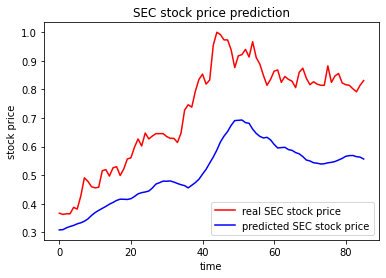

Tomorrow's SEC price : [55472.613] KRW


In [ ]:
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')